# CSCI 3202, Spring 2024: Midterm Practicum

---


This practicum is due on Canvas by **5:59 PM on Friday March 1**.  Your solutions to theoretical questions should be done in Markdown/LateX directly below the associated question. Your solutions to computational questions should include any relevant Python code, as well as results and any written commentary.


1. All work, code and analysis must be **your own**.
1. You may use your course notes, posted lecture slides, textbook, in-class notebooks and homework solutions as resources.  You may also search online for answers to general knowledge questions, like the form of a probability distribution function, or how to perform a particular operation in Python.
1. You may **not** post to message boards or other online resources asking for help.
1. **You may not collaborate with classmates or anyone else.**
1. This is meant to be like a coding portion of your midterm exam. So, I will be much less helpful than I typically am with homework. For example, I will not check answers, help debug your code, and so on.
1. If you have a question, post it first as a **private** Piazza message. If I decide that it is appropriate for the entire class, then I will make it a public post (and anonymous).
1. If something is left open-ended, it is probably because I intend for you to code it up however you want, and only care about the plots/analysis I see at the end. Feel free to ask clarifying questions though.

Violation of these rules will result in an **F** and a trip to the Honor Code council.

---
**By writing your name below, you agree to abide by these rules:**

**Your name:**

---



In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

# added packages
import heapq
from matplotlib import colors



---
## [50 pts] Problem 1:  Route-finding

Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$ with the **shortest total path length**. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you. One possible format for what this function returns is a dictionary with the keys being the tuple locations and the values of the keys being the step costs. E.g: adjacent_states((1,1)) =  $\{(2,1):1, (2,2):1.414\}$

Print to the screen the output for `adjacent_states((1,15))`.

In [2]:
maze = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

maze = np.flip(maze, 0)

def adjacent_states(state):
    x, y = state
    # dictionary of possible moves
    possibe_moves = {
        (x, y + 1): 1, # N
        (x + 1, y): 1, # E
        (x, y - 1): 1, # S
        (x - 1, y): 1, # W
        (x + 1, y + 1): math.sqrt(2), # NE
        (x + 1, y - 1): math.sqrt(2), # SE
        (x - 1, y - 1): math.sqrt(2), # SW
        (x - 1, y + 1): math.sqrt(2)  # NW
    }
    # add valid moves to reachable states dictionary
    reachable_states = {key: value for key, 
                            value in possibe_moves.items() if (0 < key[0] < 16) and (0 < key[1] < 25) and (maze[key] != 1)}
    
    return reachable_states
    
    
print(adjacent_states((1,15)))

{(1, 16): 1, (2, 15): 1, (1, 14): 1, (2, 16): 1.4142135623730951, (2, 14): 1.4142135623730951}


#### Part B
Three candidate heuristic functions might be:
1. `heuristic_cols(state, goal)` = number of columns between the argument `state` and the `goal`
1. `heuristic_rows(state, goal)` = number of rows between the argument `state` and the `goal`
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

Write a function `heuristic_max(state, goal)` that returns the maximum of all three of these heuristic functions for a given `state` and `goal`.

In [3]:
def heuristic_max(state, goal):
    # number of columns between the argument state and the goal
    h_cols = abs(state[1] - goal[1])
    # number of rows between the argument state and the goal
    h_rows = abs(state[0] - goal[0])
    # Euclidean distance between the argument state and the goal
    h_eucl = np.sqrt((state[0] - goal[0])**2 + (state[1] - goal[1])**2)
    
    return max(h_cols, h_rows, h_eucl)

print(heuristic_max((1,15), (25,9)))

24.73863375370596


#### Part C
Is the Manhattan distance an admissible heuristic function for this problem?  Explain why or why not.

No, the Manhattan distance is NOT an admissible heuristic function for this problem, as it would overestimate the cost to the goal. This is becuase it would not properly account for diagonal moves.

#### Part D
Use A\* search and the `heuristic_max` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A.

In [4]:
def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs[path[s]][path[s+1]]
    return cost

class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    
    def __init__(self, start, cost):
        self.states = {}
        self.q = []
        self.add(start, cost)
        
    def add(self, state, cost):
        ''' push the new state and cost to get there onto the heap'''
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
        self.states.pop(state)    # and remove from frontier
        return (cost, state)

    def replace(self, state, cost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return
    
def astar_search(start, goal, state_graph, heuristic, return_cost=False, return_nexp=False):
    '''A* search from `start` to `goal`
    start = initial state
    goal = goal state
    heuristic = function for estimated cost to goal (function name)
    return_cost = logical (True/False) for whether or not to return the total path cost
    return_nexp = logical (True/False) for whether or not to return the number of nodes expanded
    '''
    frontier = Frontier_PQ(start, 0)
    previous = {start: None}
    explored = {start: 0}
    n_exp = 0
    while frontier:
        #print(frontier)
        print(explored)
        cost, s = frontier.pop()  # Modify this line to unpack cost and state
        n_exp += 1
        #print('exploring {}'.format(s))
        if s == goal:
            if return_cost:
                if return_nexp:
                    return (path(previous, s), pathcost(path(previous, s), state_graph), n_exp)
                else:
                    return (path(previous, s), pathcost(path(previous, s), state_graph))
            else:
                if return_nexp:
                    return (path(previous, s), n_exp)
                else:
                    return path(previous, s)
        explored[s] = pathcost(path(previous, s), state_graph)
        for s2, step_cost in adjacent_states(s).items():
            newcost = explored[s] + step_cost + heuristic(s2, goal)
            if (s2 not in explored) and (s2 not in frontier.states):
                frontier.add(s2, newcost)
                previous[s2] = s
            elif (s2 in frontier.states) and (frontier.states[s2] > newcost):
                frontier.replace(s2, newcost)
                previous[s2] = s

                
print(astar_search((1,15), (25,9), adjacent_states, heuristic_max, return_cost=True, return_nexp=True))

{(1, 15): 0}
{(1, 15): 0}


TypeError: 'function' object is not subscriptable

#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

In [ ]:
def maze_to_graph(maze):
    ''' takes in a maze as a numpy array, converts to a graph '''
    # First we use Python's built in shape function to determine
    # how many rows and columns our maze matrix has. .shape returns
    # a tuple of rows X columns
    ny, nx = maze.shape
    # Next, we want to create a dictionary with all of the orange
    # spaces listed as the dictionary keys. We will assign each key
    # an empty dictionary as its initial value
    
    graph = {}
    
    for i in range(nx):
        for j in range(ny):
            # We only want to create an entry if the block contains a 0
            # maze[i,j] gives us the specific 0 or 1 code for each block
            # The indexing of maze is opposite of cartesian coordinates;
            if maze[j,i] == 0:
                graph[(i,j)] = {}
    for x, y in graph.keys():
        if y < ny-1 and maze[y+1,x] == 0:
            graph[(x, y)][(x, y + 1)] = "N"
            graph[(x, y + 1)][(x, y)] = "S"
            
        if x < nx-1 and maze[y, x+1] == 0:
            graph[(x, y)][(x + 1, y)] = "E"
            graph[(x + 1, y)][(x, y)] = "W"
            
    return graph

def plot_maze(maze, path=None):
    ''' visualize the binary `maze` (assumed numpy array) and solution `path` (if provided)'''

    nrow, ncol = maze.shape
    
    # create colormap
    cmap = colors.ListedColormap(['coral', 'slategray'])

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, origin='lower')
    
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k')
    ax.set_xticks(np.arange(-.5, ncol, 1))
    ax.set_yticks(np.arange(-.5, nrow, 1))
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    # now draw the solution path, if one is provided
    if path:
        for p in range(len(path)-1):
            point = path[p]
            nextpoint = path[p+1]
            plt.plot([point[0],nextpoint[0]], [point[1],nextpoint[1]], c='black')
    if path == maze_sol_bfs:
        ax.set_title("Breadth First Search Path")
    
    elif path == maze_sol_dfs:
        ax.set_title("Depth First Search Path")
    plt.show()
    

g_maze = maze_to_graph(maze)
maze_sol_astar, _ = rint(astar_search((1,15), (25,9), adjacent_states, heuristic_max))
plot_maze(maze, path=maze_sol_bfs)

---

## [50 points] Problem 2:  Calibrating a model for global mean sea level changes

**Part A:** Load and plot some data.

Let's load a couple data sets.  `data_sealevel.csv` is a data set of global mean sea levels, and the other, `data_temperature.csv` is a data set of global mean temperatures. The following bullets discuss the quantities of interest. 
* `sealevel` will be a list of global mean sea levels (millimeters). This data is found in a column which resides within the `data_sealevel.csv`
* `sealevel_sigma` will be a list of the *uncertainty* in global mean sea levels (millimeters). Use the column labeled `uncertainty` within the `data_sealevel.csv` file to obtain this data, and
* `temperature` will be a list of global mean temperatures (degrees Celsius). This data is in the `temperature` column in the `data_temperature.csv` file



In [5]:
# Here is the suggested code to load in the data files. Feel free to modify these as you wish, but that
# is not necessary.

year = []
sealevel = []
sealevel_sigma = []
temperature = []

dfSealevel = pd.read_csv("data_sealevel.csv")
dfTemperature = pd.read_csv("data_temperature.csv")

# We aren't doing any heavy-duty stats stuff, so let's just keep what we need as regular lists
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperature = dfTemperature["temperature"].tolist()

**Part A (i):**

- Make three plots for Global mean surface temperature, Sea level (mm), and Sea Level Uncertainty (mm). The x-axis for each of these plots will be the years over which this data was collected. 

- Plot the data points as a scatter plots, and plot the three plots side-by-side-by-side (one row, three columns of figures). The point here is learn how to customize your figures a bit more, and also because computer screens are (typically) wider than they are tall.

<function matplotlib.pyplot.show(close=None, block=None)>

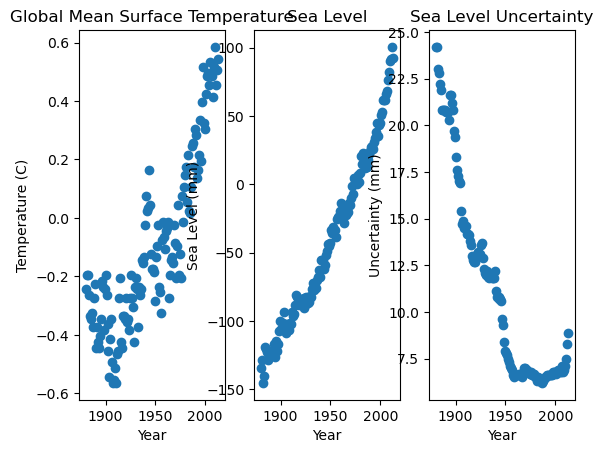

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Global mean surface temperature
ax1.scatter(year, temperature)
ax1.set_title('Global Mean Surface Temperature')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (C)')

# Sea level (mm)
ax2.scatter(year, sealevel)
ax2.set_title('Sea Level')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sea Level (mm)')

# Sea Level Uncertainty (mm)
ax3.scatter(year, sealevel_sigma)
ax3.set_title('Sea Level Uncertainty')
ax3.set_xlabel('Year')
ax3.set_ylabel('Uncertainty (mm)')

plt.show

**Part A (ii):** How does the uncertainty in global mean sea levels change as a function of time?  When is the uncertainty the highest?  Give one reason why you think this might be the case.

The uncertainty in global mean sea levels decreases as the year increases. This could be a result of better measurment equipment or sattelites. 

---

**Part B:**  The "out-of-box" sea-level model

In your plot from **(a)**, you should see quite an apparent relationship between increasing temperatures and rising sea levels.  Seeems like someone should try to model the relationship between those two, huh?

In the helper function, slr, below, a simple model for temperature-driven changes in global mean sea level (GMSL) is defined. This is the model of [Rahmstorf (2007)](http://science.sciencemag.org/content/315/5810/368).

The `slr` model takes two parameters, $\alpha$ and $T_{eq}$, and requires a time series of global mean temperatures: `slr(alpha, Teq, temperature)`.
* `alpha` is the sensitivity of sea-level changes to changes in global temperature. The units for $\alpha$ are millimeters of sea-level changes per year, or mm y$^{-1}$.
* `Teq` is the equilibrium global mean temperature, with units of degrees Celsius.
* `temperature` is the time series of global mean surface temperatures, assumed to be relative to the 1961-1990 mean.

For now, you do not need to worry too much about how this model works.  It is very simple, and widely used, but the point here is that you can plug in a particular set of temperatures (the model **forcing**) and parameters ($\alpha$ and $T_{eq}$), and out pops a time series of simulated global mean sea levels.

**Our goal:**  pick good values for $\alpha$ and $T_{eq}$, so that when we run the `slr` model using the observations of temperature (which we plotted above), the model output matches well the observations of global mean sea level (which we also plotted above).

The whole process of figuring out what these good parameter values are is called **model calibration**, and it's awesome.  Model Calibration is the point of this problem. Let's have a look at why we need to do this in the first place, shall we?

The default parameter choices given in the Rahmstorf (2007) paper are $\alpha=3.4$ mm y$^{-1}$ and $T_{eq} = -0.5\ ^{\circ}$C.

**Your task for Part B:**

Make a plot that contains:
* the observed sea level data as scatter points
* the modeled sea levels as a line, using the temperature observations from above as the `temperature` input
* an appropriate legend and axis labels
* $x$ axis is years
* $y$ axis is sea level

Note that after you run the `slr` model, you will need to **normalize** the output relative to the 1961-1990 reference period.  That is because you are going to compare it against data that is also normalized against this reference period. The `years` that correspond to the model output should be the same as the `years` that correspond to the `temperature` input. Normalizing data can mean several things. Follow the steps outlined below to "normalize" the data in the way needed for this problem:
- Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
- Subtract this value from each entry in the "sealevel" list (list returned by the slr function)


Make sure that you normalize the data prior to plotting.

In [7]:
# helpers

def slr(alpha, Teq, temperature):
    '''sea-level emulator of Rahmstorf 2007 (DOI: 10.1126/science.1135456)
    Takes global mean temperature as forcing, and parameters:
    alpha = temperature sensitivity of sea level rise, and
    Teq   = equilibrium temperature,
    and calculates a rise/fall in sea levels, based on whether the temperature
    is warmer/cooler than the equilibrium temperature Teq.
    Here, we are only worrying about alpha (for now!)'''

    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel




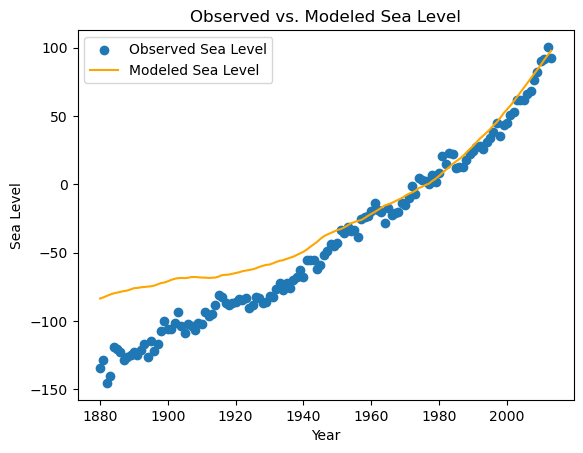

In [10]:
# model
sealevel_slr_init = slr(3.4, -.5, temperature)
# normalize for 1961-1990
sealevel_slr_init = [i - np.mean(sealevel_slr_init[81:110]) for i in sealevel_slr_init]

# observed sea level data as scatter points
plt.scatter(year, sealevel, label='Observed Sea Level')
# modeled sea levels as a line
plt.plot(year, sealevel_slr_init, color='orange', label='Modeled Sea Level')

# label
plt.title('Observed vs. Modeled Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.legend()

plt.show()

Your plot above ought to show decent match for the late 1900s, but diverge a bit further back in time.

**The point:**  We can do better than this "out-of-the-box" version of the Rahmstorf sea level model.

**Part C:**   Figuring out our objective function

As our **objective function**, we will use the joint likelihood function of the observed sea level data, given the model simulation.  The following is a detailed description of the derivation of the objective funciton for a hill climbing routine. **Note, you do not need to do anything for this part other than to read about the objective function and execute the cell below, then move to part D.**

For a single data point in year $i$, $y_i$, with associated uncertainty $\sigma_i$, we can assume the likelihood for our model simulation in year $i$, $\eta_i$, follows a normal distribution centered at the data point.  The model simulation is a **deterministic** result of our parameter choices $\alpha$ and $T_{eq}$, so we write the likelihood as:

$$L(y_i \mid \alpha, T_{eq}) = \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

But that only uses a single data point.  Let's use all the data!  The **joint likelihood** is the product of all of the likelihoods associated with the individual data points. But that is the product of a lot of numbers that are less than 1, so it will be **tiny**.  Instead, we should try to optimize the **joint log-likelihood**, which is simply the (natural) logarithm of the joint likelihood function.

If we assume the observational data ($y_i$) are all independent, then the joint log-likelihood is:

$$l(\mathbf{y} \mid \alpha, T_{eq}) = -\dfrac{N}{2} \log{(2\pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \dfrac{1}{2}\sum_{i=1}^N \left( \dfrac{\eta_i(\alpha, T_{eq}) - y_i}{\sigma_i} \right)^2$$

where, $\mathbf{y} = [y_1, y_2, \ldots, y_N]$ is the entire vector (list) of sea level observations, $\eta(\alpha, T_{eq}) = [\eta_1(\alpha, T_{eq}), \eta_2(\alpha, T_{eq}), \ldots, \eta_N(\alpha, T_{eq})]$ is the entire vector (list) of `slr` model output when the parameter values $\alpha$ and $T_{eq}$ are used, and $N$ is the number of observations we have.


**Defining our objective function**

Now define a `log_likelihood(parameters, obs_mu, obs_sigma)` function:
* `parameters`: argument that is a list of two parameter values, $[\alpha, T_{eq}]$
  * within the likelihood function, you will need to generate the model simulation $\eta(\alpha, T_{eq})$ using the input `parameters`, for comparison against the observational data
* `obs_temp`: argument that is a time series (list) of observed global mean temperatures, that will be used to run the `slr` model. Provide a default value of `temperature` for this, because we only have one temperature data set to use, and we don't want to keep 
* `obs_mu`: argument that is a time series (list) of observed values, that will be used for comparison against the `model` output. Provide a default value of `sealevel` here, because we won't be changing the observational data.
* `obs_sigma`: argument that is a time series (list) of the corresponding uncertainties in the observational data. Simiarly, provide a default value of `sealevel_sigma` here, so we can avoid the tedious task of sending the data set into this function.
* all three of these inputs should be lists, and should be the same length
* this routine should return a **single** float number, that is the joint log-likelihood of the given `model` simulation.

In [11]:
# Here is the objective function. You will be using this function below when you code up hill-climbing and 
# simulated annealing routines.

def log_likelihood(parameters, obs_temp=temperature, obs_mu=sealevel, obs_sigma=sealevel_sigma):
    model = slr(alpha=parameters[0], Teq=parameters[1], temperature=temperature)
    
    # normalize
    reference = (year.index(1961), year.index(1990))
    model -= np.mean(model[reference[0]:(reference[1]+1)])

    return np.sum([np.log(stats.norm.pdf(x=model, loc=obs_mu, scale=obs_sigma))])

**Part D:**  Defining our class structure

Now we will apply a hill-climbing algorithm to tune the $\alpha$ and $T_{eq}$ parameters.

Using our in-class lecture notebook on hill-climbing as a guide, do the following:

* Define a `State` class, with attributes for the parameter values (which define the state) and the objective function value of that state.
* Define a `Problem_hillclimb` **sub-class** of the more general class `Problem`, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * methods for `moves` (return the list of all possible moves from the current state) and `best_move` (return the move that maximizes the objective function).
  * the `moves` available should be in proper 2-dimensional space.  Do **not** simply optimize one parameter, keeping the other fixed, then optimize the other parameter, while keeping the first fixed.  (*That method *can* work, but there are some theoretical issues that would need to be tackled, and we are not getting into that here.*) You are allowed to restrict yourself to movements along a grid, as long as you entertain steps in both the $\alpha$ and the $T_{eq}$ directions.
* Define the `hill_climb` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `hill_climb(problem, n_iter)`:  arguments are a `Problem_hillclimb` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

In [35]:
class State:
    def __init__(self, parameters, objective_function_value):
        self.parameters = parameters
        self.objective_function_value = objective_function_value

class Problem_hillclimb:
    def __init__(self, current_state, objective_function, stepsize_alpha, stepsize_Teq):
        self.current_state = current_state
        self.objective_function = objective_function
        self.stepsize_alpha = stepsize_alpha
        self.stepsize_Teq = stepsize_Teq

    def moves(self):
        alpha_moves = [self.current_state.parameters[0] + self.stepsize_alpha, self.current_state.parameters[0] - self.stepsize_alpha]
        Teq_moves = [self.current_state.parameters[1] + self.stepsize_Teq, self.current_state.parameters[1] - self.stepsize_Teq]
        # print([(a, t) for a in alpha_moves for t in Teq_moves])
        return [(a, t) for a in alpha_moves for t in Teq_moves]

    def best_move(self, moves):
        best_move = moves[0]
        best_log_likelihood = self.objective_function(best_move)

        for move in moves[1:]:
            current_log_likelihood = self.objective_function(move)
            if current_log_likelihood > best_log_likelihood:
                best_move = move
                best_log_likelihood = current_log_likelihood

        return best_move

def hill_climb(problem, n_iter):
    for _ in range(n_iter):
        moves = problem.moves()
        best_move = problem.best_move(moves)
        
        if (problem.objective_function(best_move) > problem.objective_function(problem.current_state.parameters)):
            problem.current_state = State(best_move, problem.objective_function(best_move))
    
    return problem.current_state

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a hill-climbing problem object, using this initial state, the log-likelihood objective function, and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
3. ***hill-climb!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**
* As a benchmark, make sure that your log-likelihood is *at least* -500.
* Your calibrated (optimized) model simulation should be going straight through the data points.
* If this isn't the case, remember to normalize your model against the 1961-1990 reference period!

Initial log-likelihood value:  -576.2160507179199   Parameters:  [3.4, -0.5]
Calibrated log-likelihood value:  -472.9051753194014   Parameters:  (2.5060000000000984, -0.7620000000000002)


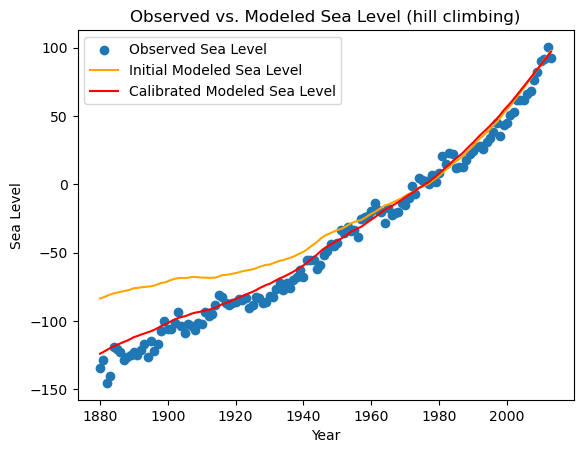

In [50]:
# hill climb
initial_state = State([3.4, -.5], log_likelihood([3.4, -.5]))
hillclimb_problem = Problem_hillclimb(initial_state, log_likelihood, 0.001, 0.001)

# Run hill-climb algorithm
cal_state = hill_climb(hillclimb_problem, 1000)

print("Initial log-likelihood value: ", log_likelihood([3.4, -.5]), "  Parameters: ", [3.4, -.5])
print("Calibrated log-likelihood value: ", cal_state.objective_function_value, "  Parameters: ", cal_state.parameters)

# calibrated model
sealevel_slr_cal = slr(cal_state.parameters[0], cal_state.parameters[1], temperature)
# normalize for 1961-1990
sealevel_slr_cal = [i - np.mean(sealevel_slr_cal[81:110]) for i in sealevel_slr_cal]

# observed sea level data as scatter points
plt.scatter(year, sealevel, label='Observed Sea Level')
# initial modeled sea levels as a line
plt.plot(year, sealevel_slr_init, color='orange', label='Initial Modeled Sea Level')
# calibrated modeled sea levels as a line
plt.plot(year, sealevel_slr_cal, color='red', label='Calibrated Modeled Sea Level')

# label
plt.title('Observed vs. Modeled Sea Level (hill climbing)')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.legend()

plt.show()

**Part E:**  Simulated annealing

Let's re-calibrate the `slr` model. This time, we will use **simulated annealing**. Again, using our in-class activity as a guide, do the following:

* Continue to use your `State` class above.
* Define a `Problem_annealing` sub-class of the `Problem` class, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * method for `random_move`, to pick a random move **by drawing from a multivariate normal distribution**.  You should use the `stepsize` attribute as the covariance (width) for this.
* Define the `simulated_annealing` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `simulated_annealing(problem, n_iter)`:  arguments are a `Problem_annealing` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

Subject to the above constraints, you may implement these however you would like.

In [58]:
class Problem_annealing:
    def __init__(self, current_state, objective_function, stepsize_alpha, stepsize_Teq, temperature):
        self.current_state = current_state
        self.objective_function = objective_function
        self.stepsize_alpha = stepsize_alpha
        self.stepsize_Teq = stepsize_Teq
        self.temperature = temperature

    def random_move(self):
        alpha_move = np.random.normal(0, self.stepsize_alpha)
        Teq_move = np.random.normal(0, self.stepsize_Teq)
        return (alpha_move, Teq_move)

def simulated_annealing(problem, n_iter):
    for _ in range(n_iter):
        # get random move
        random_move = problem.random_move()

        # calculate objective function values
        current_value = problem.objective_function(problem.current_state.parameters)
        new_parameters = (problem.current_state.parameters[0] + random_move[0], 
                          problem.current_state.parameters[1] + random_move[1])
        new_value = problem.objective_function(new_parameters)

        # choose to accept or reject
        if (new_value > current_value) or (np.random.rand() < np.exp((new_value - current_value) / problem.temperature)):
            problem.current_state = State(parameters=new_parameters, objective_function_value=new_value)

        # update temp
        problem.temperature *= 0.95

    return problem.current_state

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a simulated annealing problem object, using this initial state, the log-likelihood objective function, an appropriate temperature updating schedule and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
  * note that this "temperature" is distinct from the actual physical temperature used as input to drive the `slr` model
3. ***anneal!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**  How does your model look when you plot it against the data? If it doesn't look good, then you failed this unit test :(

Initial log-likelihood value:  -576.2160507179199   Parameters:  [3.4, -0.5]
Calibrated log-likelihood value:  -497.5231065674451   Parameters:  (3.1719165681645247, -0.619737803255131)


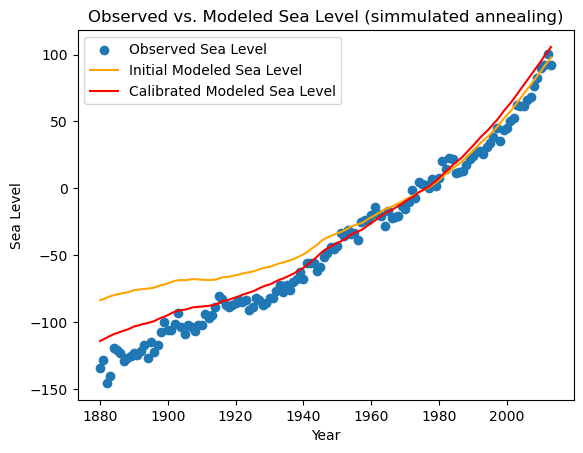

In [60]:
# simmulated annealing
initial_state = State([3.4, -.5], log_likelihood([3.4, -.5]))
annealing_problem = Problem_annealing(initial_state, log_likelihood, 0.001, 0.001, 1)

# Run simmulated annealing algorithm
cal_state = simulated_annealing(annealing_problem, 1000)

print("Initial log-likelihood value: ", log_likelihood([3.4, -.5]), "  Parameters: ", [3.4, -.5])
print("Calibrated log-likelihood value: ", cal_state.objective_function_value, "  Parameters: ", cal_state.parameters)

# calibrated model
sealevel_slr_cal = slr(cal_state.parameters[0], cal_state.parameters[1], temperature)
# normalize for 1961-1990
sealevel_slr_cal = [i - np.mean(sealevel_slr_cal[81:110]) for i in sealevel_slr_cal]

# observed sea level data as scatter points
plt.scatter(year, sealevel, label='Observed Sea Level')
# initial modeled sea levels as a line
plt.plot(year, sealevel_slr_init, color='orange', label='Initial Modeled Sea Level')
# calibrated modeled sea levels as a line
plt.plot(year, sealevel_slr_cal, color='red', label='Calibrated Modeled Sea Level')

# label
plt.title('Observed vs. Modeled Sea Level (simmulated annealing)')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.legend()

plt.show()

**Part F:**

Briefly summarize your findings. Specifically discuss the $\alpha$ and $T_{eq}$ parameter values you found in **Part D** and **Part E**. How do these compare to the parameters of the model given by Rahmstorf? Did your hill-climbing and/or your simulated annealing programs find a better fit than the Rahmstorf model? 

Initial log-likelihood value:  -576.2160507179199   Parameters:  (3.4, -0.5)

Calibrated log-likelihood value (hill climbing):  -472.9051753194014   Parameters:  (2.5060000000000984, -0.7620000000000002)

Calibrated log-likelihood value:  -494.64744536949127   Parameters:  (3.1130303790601026, -0.632562183543733)

The hill climbing program found a better fit than the Rahmstorf model and the simulated annealing program.
The simulated annealing program found a better fit than both the Rahmstorf model.